In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams['figure.dpi'] = 300
plt.ioff()

In [3]:
data14 = {} # data[L, p, n] contains (fail_rate, samples)
for f in glob.glob('data/run_14/run_14_*.npy'):
    n = int(f.split("_")[3].split(".")[0])
    L = int(50 * ((n % 100) // 20 + 1)) # L = 50, 100, 150, 200, 250
    p_error = ((n % 20) + 380) # p_error = 0.00380, 0.00381, 0.00382, ..., 0.00399
    if not(n == 924 or n == 234 or n == 555): # BAD DATA :(
        data14[L, p_error, n // 100] = np.load(f)

data13 = {} # data[L, p, n] contains (fail_rate, samples)
for f in glob.glob('data/run_13/run_13_*.npy'):
    n = int(f.split("_")[3].split(".")[0])
    L = int(50 * ((n % 100) // 20 + 1)) # L = 50, 100, 150, 200, 250
    p_error = ((n % 20) + 400) # p_error = 0.00400, 0.00401, 0.00402, ..., 0.00419
    if not(n == 684 or n == 337): # BAD DATA ?
        data13[L, p_error, n//100] = np.load(f)

In [4]:
print(data[100, 384, 9]) # 924
data[100, 384, 9][0] = np.NaN
data[100, 384, 9][1] = np.NaN
"""
924
Running on NVIDIA GeForce RTX 2080 Ti with 11.33 GB of VRAM.
Failure rate: 0.0012090842951440104 ± 1.1051907622774118e-05
9886821 samples for L=100 and p=0.00384 took time:
11:29:35
Actually utilized 8.79 GB of VRAM.
"""
print(data[100, 394, 2]) # 234
data[100, 394, 2][0] = np.NaN
data[100, 394, 2][1] = np.NaN
"""
234
Running on NVIDIA GeForce RTX 2080 Ti with 11.33 GB of VRAM.
Failure rate: 0.0013871590939031225 ± 1.1870837233073056e-05
9830163 samples for L=100 and p=0.00394 took time:
11:29:09
Actually utilized 8.79 GB of VRAM.
"""
print(data[150, 395, 5]) # 555
data[150, 395, 5][0] = np.NaN
data[150, 395, 5][1] = np.NaN
"""
555
Running on NVIDIA GeForce RTX 2080 Ti with 11.33 GB of VRAM.
Failure rate: 0.0033394193838991297 ± 3.382908627812669e-05
2908290 samples for L=150 and p=0.00395 took time:
11:27:35
Actually utilized 8.79 GB of VRAM.
"""

[1.2090843e-03 9.8868210e+06]
[1.38715909e-03 9.83016300e+06]
[3.33941938e-03 2.90829000e+06]


'\n555\nRunning on NVIDIA GeForce RTX 2080 Ti with 11.33 GB of VRAM.\nFailure rate: 0.0033394193838991297 ± 3.382908627812669e-05\n2908290 samples for L=150 and p=0.00395 took time:\n11:27:35\nActually utilized 8.79 GB of VRAM.\n'

In [4]:
data_array = np.empty((5, 40, 10, 2))
for i, L in enumerate([50, 100, 150, 200, 250]):
    for j, p in enumerate(np.linspace(380, 399, 20)):
        for n in range(10):
            try:
                data_array[i, j, n] = data14[L, p, n]
            except KeyError:
                data_array[i, j, n, 0] = np.NaN
                data_array[i, j, n, 1] = np.NaN
for i, L in enumerate([50, 100, 150, 200, 250]):
    for j, p in enumerate(np.linspace(400, 419, 20)):
        for n in range(10):
            try:
                data_array[i, j+20, n] = data13[L, p, n]
            except KeyError:
                data_array[i, j+20, n, 0] = np.NaN
                data_array[i, j+20, n, 1] = np.NaN

In [5]:
fail_rate = data_array[:, :, :, 0]
samples = data_array[:, :, :, 1]

In [6]:
fail_rate = np.nanmean(fail_rate, axis=2)
samples = np.nansum(samples, axis=2)

In [7]:
error = np.sqrt(fail_rate * (1 - fail_rate) / samples)

In [8]:
L_ticks = np.linspace(50, 250, 5).astype(int)
p_ticks = np.linspace(380, 419, 40)/100000

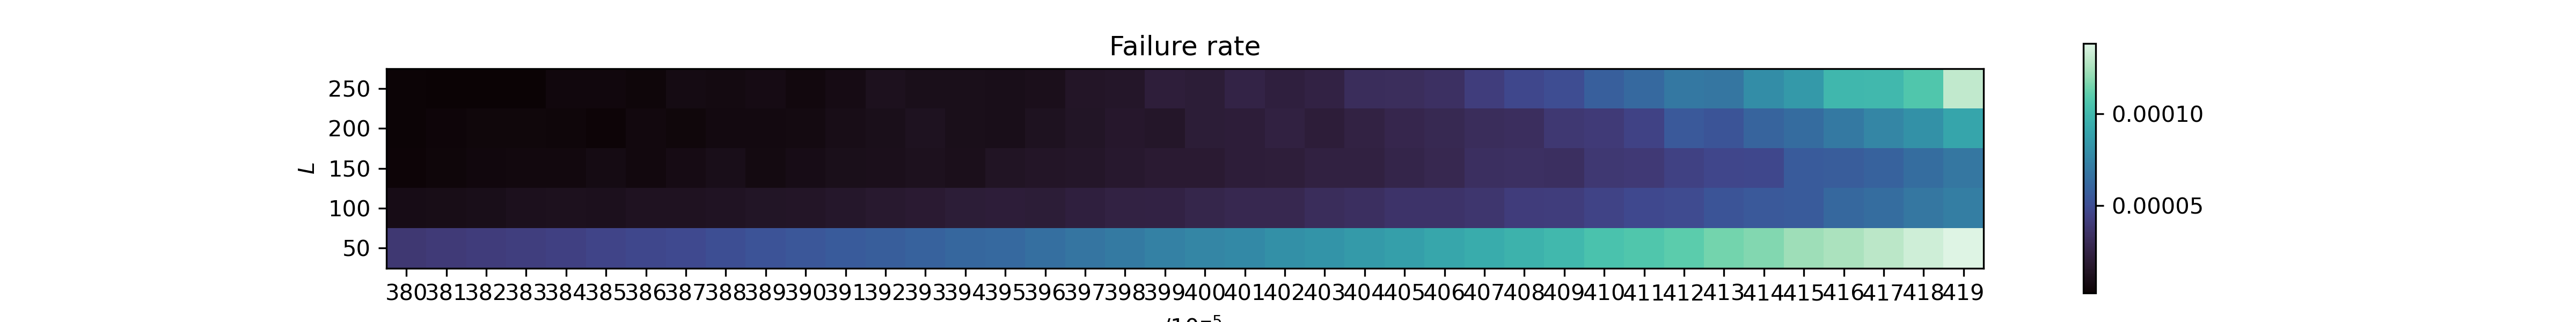

In [9]:
plt.matshow(fail_rate, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Failure rate")
plt.ylabel("$L$")
plt.xlabel(r"$p/10^{-5}$")
plt.yticks(range(L_ticks.shape[0]), L_ticks)
plt.xticks(range(p_ticks.shape[0]), np.linspace(380, 419, 40).astype(int))
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run14_fail_heatmap.png")
plt.show()

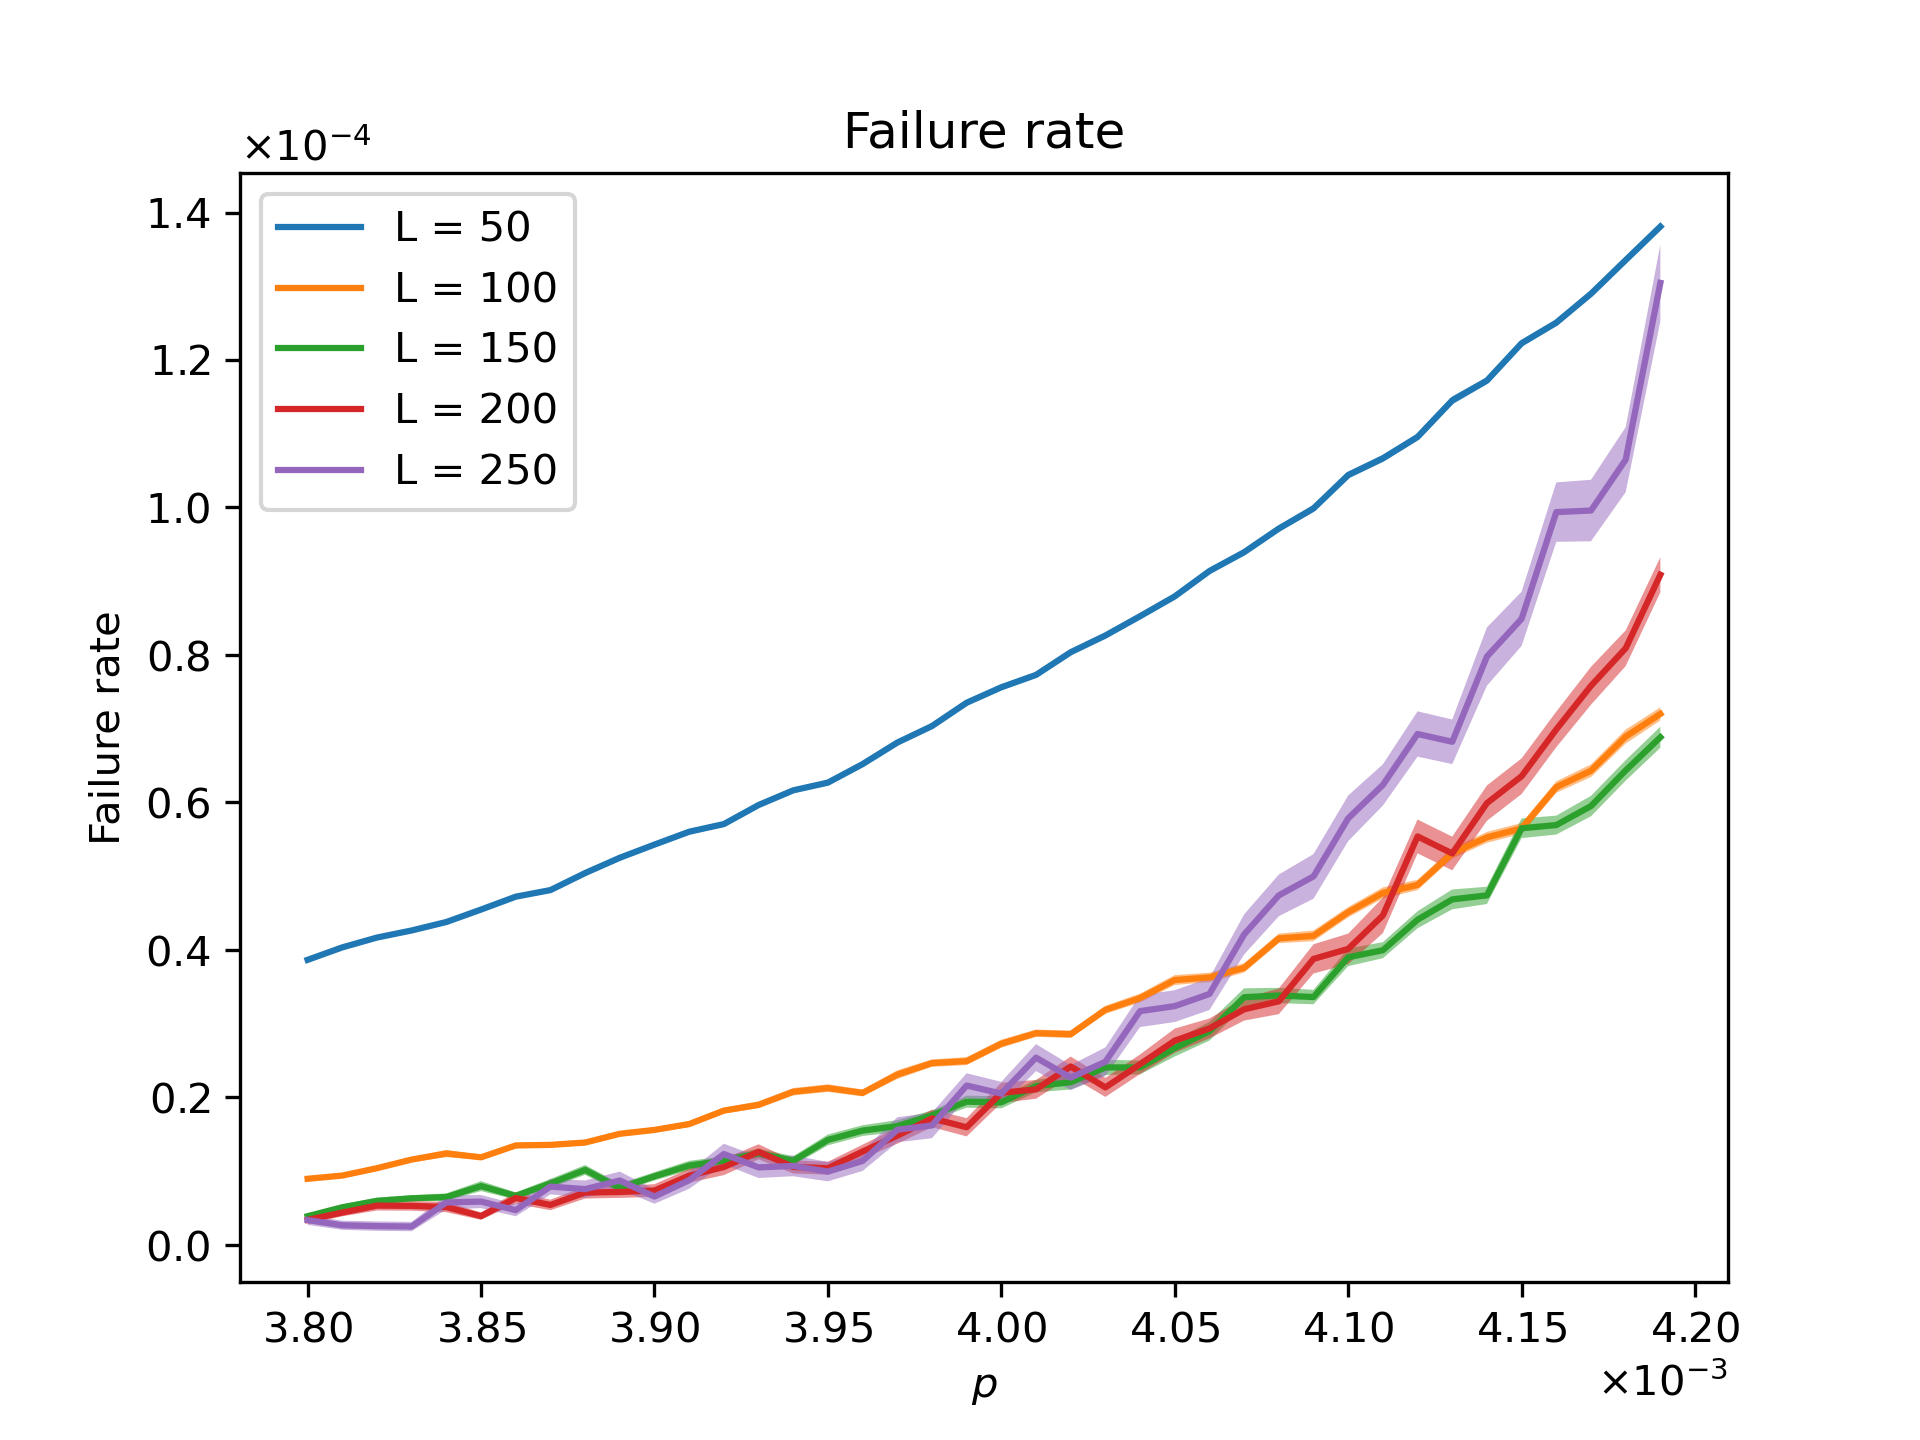

In [10]:
plt.clf()
for i, L in enumerate(L_ticks):
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    plt.fill_between(p_ticks, fail_rate[i]-error[i], fail_rate[i]+error[i], alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
# plt.xticks()
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.savefig("plots/run14_fail_linear.png")
plt.show()

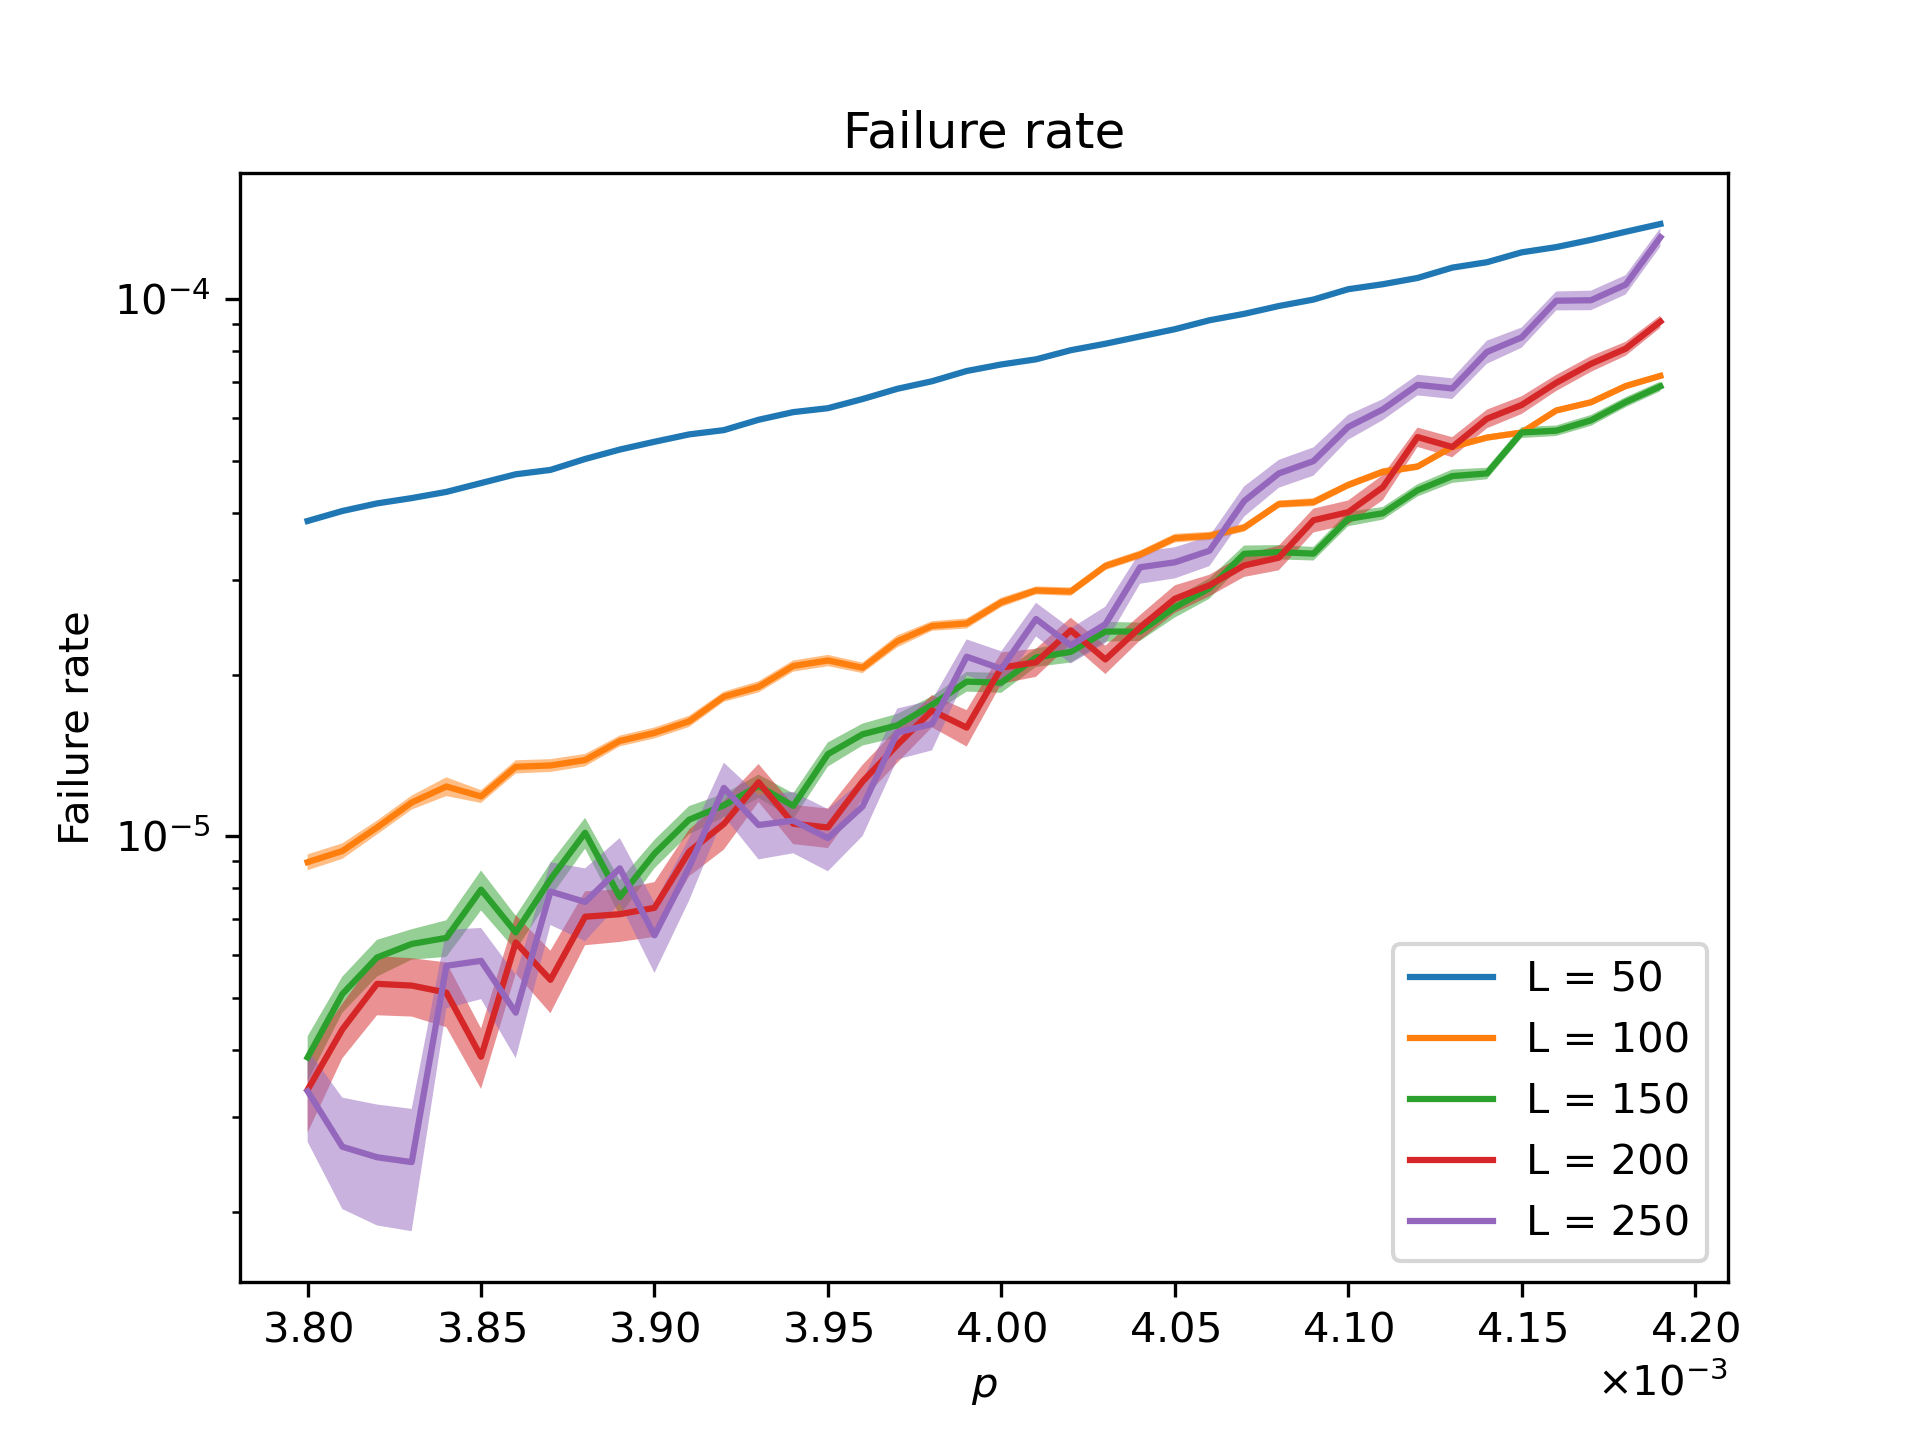

In [11]:
plt.clf()
for i, L in enumerate(L_ticks):
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    plt.fill_between(p_ticks, fail_rate[i]-error[i], fail_rate[i]+error[i], alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.yscale("log")
plt.savefig("plots/run14_fail_log.png")
plt.show()